In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import xarray as xr
import seaborn as sns


## gulf: load data 

In [11]:
CASE_NAME = 'gulf/'
BASE = '/scratch/ab10313/submeso_ML_data/'
PATH = BASE+CASE_NAME

# Load all datasets
PATH_PP = PATH+'preprocessed_data/'
PATH_SNAP = PATH+'snapshots/'

# highres snapshots
B_snap = np.load(PATH_SNAP+'B.npy')[5:-5,5:-5]
U_snap = np.load(PATH_SNAP+'U.npy')[5:-5,5:-5]
V_snap = np.load(PATH_SNAP+'V.npy')[5:-5,5:-5]
W_snap = np.load(PATH_SNAP+'W.npy')[5:-5,5:-5]

# submesoscale fields
UsBs_MLD_lowres = xr.open_dataarray(PATH_PP+'UsBs_MLD_lowres.nc').isel(lon=slice(5,-5))
VsBs_MLD_lowres = xr.open_dataarray(PATH_PP+'VsBs_MLD_lowres.nc').isel(lon=slice(5,-5))
WsBs_MLD_lowres = xr.open_dataarray(PATH_PP+'WsBs_MLD_lowres.nc').isel(lon=slice(5,-5))

# buoyancy gradients
Bm_x_MLD_lowres = xr.open_dataarray(PATH_PP+'Bm_x_MLD_lowres.nc').isel(lon=slice(5,-5))
Bm_y_MLD_lowres = xr.open_dataarray(PATH_PP+'Bm_y_MLD_lowres.nc').isel(lon=slice(5,-5))
Bm_z_MLD_lowres = xr.open_dataarray(PATH_PP+'Bm_z_MLD_lowres.nc').isel(lon=slice(5,-5))

# mesoscale fields
Bm_MLD_lowres = xr.open_dataarray(PATH_PP+'Bm_MLD_lowres.nc').isel(lon=slice(5,-5))
Um_MLD_lowres = xr.open_dataarray(PATH_PP+'Um_MLD_lowres.nc').isel(lon=slice(5,-5))
Vm_MLD_lowres = xr.open_dataarray(PATH_PP+'Vm_MLD_lowres.nc').isel(lon=slice(5,-5))
Wm_MLD_lowres = xr.open_dataarray(PATH_PP+'Wm_MLD_lowres.nc').isel(lon=slice(5,-5))


# Visualize

Text(0.5, 1.0, 'B highres')

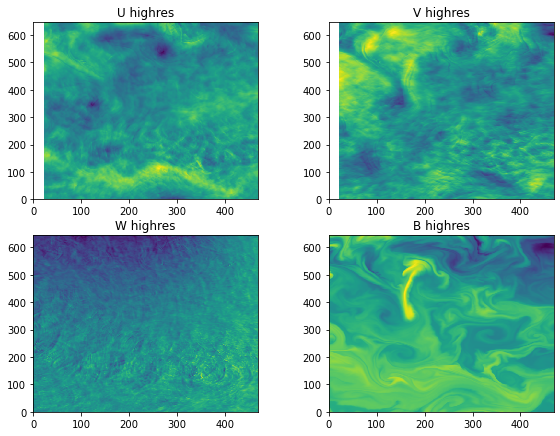

In [12]:
# visualize meso
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 6))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(221)
plt.pcolor(U_snap, cmap='viridis')
plt.title('U highres')

plt.subplot(222)
plt.pcolor(V_snap, cmap='viridis')
plt.title('V highres')

plt.subplot(223)
plt.pcolor(W_snap, cmap='viridis')
plt.title('W highres')

plt.subplot(224)
plt.pcolor(B_snap, cmap='viridis')
plt.title('B highres')

Text(0.5, 1.0, 'WsBs')

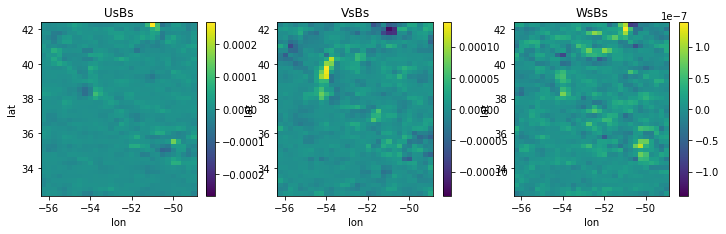

In [13]:
# visualize fluxes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(131)
UsBs_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('UsBs')

plt.subplot(132)
VsBs_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('VsBs')

plt.subplot(133)
WsBs_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('WsBs')

Text(0.5, 1.0, 'Bm_z')

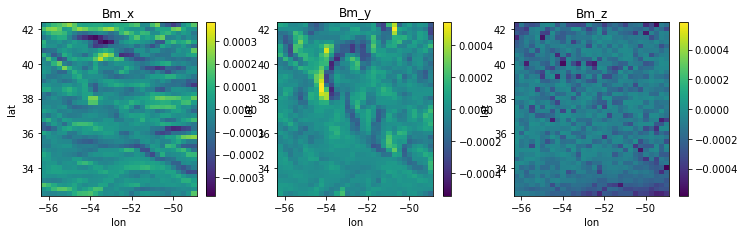

In [14]:
# visualize b grads
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(131)
Bm_y_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('Bm_x')

plt.subplot(132)
Bm_x_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('Bm_y')

plt.subplot(133)
Bm_z_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('Bm_z')

Text(0.5, 1.0, 'Bm')

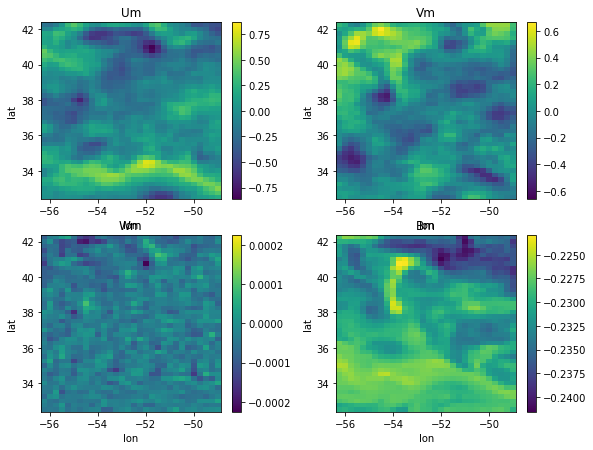

In [15]:
# visualize meso
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 6))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(221)
Um_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('Um')

plt.subplot(222)
Vm_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('Vm')

plt.subplot(223)
Wm_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('Wm')

plt.subplot(224)
Bm_MLD_lowres.isel(time=0).plot(cmap='viridis')
plt.title('Bm')

# seasonality

In [16]:
# group by seasons

UsBs_seasons = UsBs_MLD_lowres.groupby("time.season")
VsBs_seasons = VsBs_MLD_lowres.groupby("time.season")
WsBs_seasons = WsBs_MLD_lowres.groupby("time.season")

Bm_x_seasons = Bm_x_MLD_lowres.groupby("time.season")
Bm_y_seasons = Bm_y_MLD_lowres.groupby("time.season")
Bm_z_seasons = Bm_z_MLD_lowres.groupby("time.season")

Bm_seasons = Bm_MLD_lowres.groupby("time.season")
Um_seasons = Um_MLD_lowres.groupby("time.season")
Vm_seasons = Vm_MLD_lowres.groupby("time.season")
Wm_seasons = Wm_MLD_lowres.groupby("time.season")


# variability 

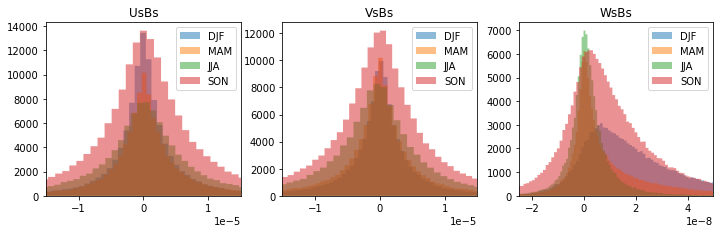

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(131)
plt.title('UsBs')
_=plt.hist(UsBs_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
plt.xlim(-1.5e-5,1.5e-5)
_=plt.hist(UsBs_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
plt.xlim(-1.5e-5,1.5e-5)
_=plt.hist(UsBs_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
plt.xlim(-1.5e-5,1.5e-5)
_=plt.hist(UsBs_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
plt.xlim(-1.5e-5,1.5e-5)
plt.legend()

plt.subplot(132)
plt.title('VsBs')
_=plt.hist(VsBs_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
plt.xlim(-1.5e-5,1.5e-5)
_=plt.hist(VsBs_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
plt.xlim(-1.5e-5,1.5e-5)
_=plt.hist(VsBs_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
plt.xlim(-1.5e-5,1.5e-5)
_=plt.hist(VsBs_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
plt.xlim(-1.5e-5,1.5e-5)
plt.legend()

plt.subplot(133)
plt.title('WsBs')
_=plt.hist(WsBs_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
plt.xlim(-2.5e-8,5e-8)
_=plt.hist(WsBs_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
plt.xlim(-2.5e-8,5e-8)
_=plt.hist(WsBs_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
plt.xlim(-2.5e-8,5e-8)
_=plt.hist(WsBs_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
plt.xlim(-2.5e-8,5e-8)
plt.legend()


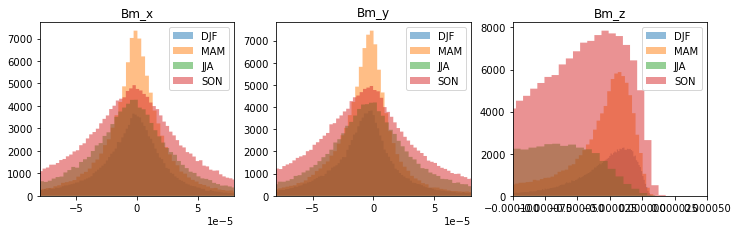

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(131)
plt.title('Bm_x')
_=plt.hist(Bm_x_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
plt.xlim(-8e-5,8e-5)
_=plt.hist(Bm_x_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
plt.xlim(-8e-5,8e-5)
_=plt.hist(Bm_x_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
plt.xlim(-8e-5,8e-5)
_=plt.hist(Bm_x_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
plt.xlim(-8e-5,8e-5)
plt.legend()

plt.subplot(132)
plt.title('Bm_y')
_=plt.hist(Bm_y_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
plt.xlim(-8e-5,8e-5)
_=plt.hist(Bm_y_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
plt.xlim(-8e-5,8e-5)
_=plt.hist(Bm_y_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
plt.xlim(-8e-5,8e-5)
_=plt.hist(Bm_y_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
plt.xlim(-8e-5,8e-5)
plt.legend()

plt.subplot(133)
plt.title('Bm_z')
_=plt.hist(Bm_z_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
plt.xlim(-1e-1,5e-5)
_=plt.hist(Bm_z_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
plt.xlim(-1e-4,5e-5)
_=plt.hist(Bm_z_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
plt.xlim(-1e-4,5e-5)
_=plt.hist(Bm_z_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
plt.xlim(-1e-4,5e-5)
plt.legend()


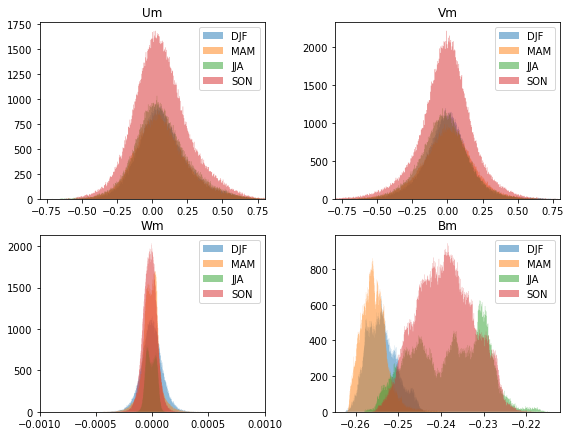

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 6))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

plt.subplot(221)
plt.title('Um')
_=plt.hist(Um_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
plt.xlim(-8e-1,8e-1)
_=plt.hist(Um_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
plt.xlim(-8e-1,8e-1)
_=plt.hist(Um_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
plt.xlim(-8e-1,8e-1)
_=plt.hist(Um_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
plt.xlim(-8e-1,8e-1)
plt.legend()

plt.subplot(222)
plt.title('Vm')
_=plt.hist(Vm_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
plt.xlim(-8e-1,8e-1)
_=plt.hist(Vm_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
plt.xlim(-8e-1,8e-1)
_=plt.hist(Vm_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
plt.xlim(-8e-1,8e-1)
_=plt.hist(Vm_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
plt.xlim(-8e-1,8e-1)
plt.legend()

plt.subplot(223)
plt.title('Wm')
_=plt.hist(Wm_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
plt.xlim(-1e-3,1e-3)
_=plt.hist(Wm_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
plt.xlim(-1e-3,1e-3)
_=plt.hist(Wm_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
plt.xlim(-1e-3,1e-3)
_=plt.hist(Wm_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
plt.xlim(-1e-3,1e-3)
plt.legend()

plt.subplot(224)
plt.title('Bm')
_=plt.hist(Bm_seasons["DJF"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="DJF")
#plt.xlim(-2.75e-1,-2.5e-1)
_=plt.hist(Bm_seasons["MAM"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="MAM")
#plt.xlim(-2.75e-1,-2.5e-1)
_=plt.hist(Bm_seasons["JJA"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="JJA")
#plt.xlim(-2.75e-1,-2.5e-1)
_=plt.hist(Bm_seasons["SON"].to_numpy().flatten(),bins=500,alpha=0.5,histtype='stepfilled',label="SON")
#plt.xlim(-2.75e-1,-2.5e-1)
plt.legend()
